# Spotify Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/spotify_dataset.csv')

## Cleaning our dataset and overview

Let's look at the first 5 rows:

In [2]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


... and the last 5 rows:

In [3]:
df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


Now, let's take a look at our datapoints:

In [4]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

### Value description:

- *artist*: Name of the Artist.
- *song*: Name of the Track.
- *duration_ms*: Duration of the track in milliseconds.
- *explicit*: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- *year*: Release Year of the track.
- *popularity*: The higher the value the more popular the song is.
- *danceability*: Danceability describes how suitable a track is for dancing.
- *energy*: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- *key*: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- *loudness*: Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
- *mode*: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
- *speechiness*: Speechiness detects the presence of spoken words in a track.
- *acousticness*: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- *instrumentalness*: Predicts whether a track contains no vocals.
- *liveness*: Detects the presence of an audience in the recording.
- *valence*: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- *tempo*: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- *genre*: Genre of the track.

In [3]:
from prep_data import clean_data
clean_data(df)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [7]:
# Overview of unique release years
release_years = np.sort(df['year'].unique())
print(release_years)                       

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020]


As we can see, this dataset seems to include data from years before 2000 and after 2019. Since this dataset was only supposed to comprise data of the years 2000-2019, we will get rid of this data:

In [8]:
data_drop = df[(df['year'] < 2000) | (df['year'] > 2019)].index
df = df.drop(data_drop)   

Let's get some more information on our dataset:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1899 non-null   object 
 1   song              1899 non-null   object 
 2   duration_ms       1899 non-null   int64  
 3   explicit          1899 non-null   bool   
 4   year              1899 non-null   int64  
 5   popularity        1899 non-null   int64  
 6   danceability      1899 non-null   float64
 7   energy            1899 non-null   float64
 8   key               1899 non-null   int64  
 9   loudness          1899 non-null   float64
 10  mode              1899 non-null   int64  
 11  speechiness       1899 non-null   float64
 12  acousticness      1899 non-null   float64
 13  instrumentalness  1899 non-null   float64
 14  liveness          1899 non-null   float64
 15  valence           1899 non-null   float64
 16  tempo             1899 non-null   float64
 17  

In [10]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,228123.525540,2009.720379,59.558715,0.667637,0.721256,5.379147,-5.503538,0.553976,0.104413,0.127722,0.015525,0.181934,0.552579,120.115425
std,39116.687604,5.725938,21.683909,0.140547,0.152511,3.610882,1.931067,0.497209,0.096523,0.172951,0.089036,0.140827,0.220361,26.986107
min,113000.000000,2000.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203273.000000,2005.000000,56.000000,0.581000,0.624500,2.000000,-6.480000,0.000000,0.039900,0.013550,0.000000,0.088750,0.389500,98.605000
50%,222920.000000,2010.000000,65.000000,0.676000,0.738000,6.000000,-5.279000,1.000000,0.061300,0.055300,0.000000,0.125000,0.559000,120.028000
75%,247086.000000,2015.000000,73.000000,0.765000,0.839000,8.000000,-4.167000,1.000000,0.130500,0.175000,0.000064,0.242000,0.730500,134.124500
max,484146.000000,2019.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Data Analysis and Visualization

### Top 10 Artists

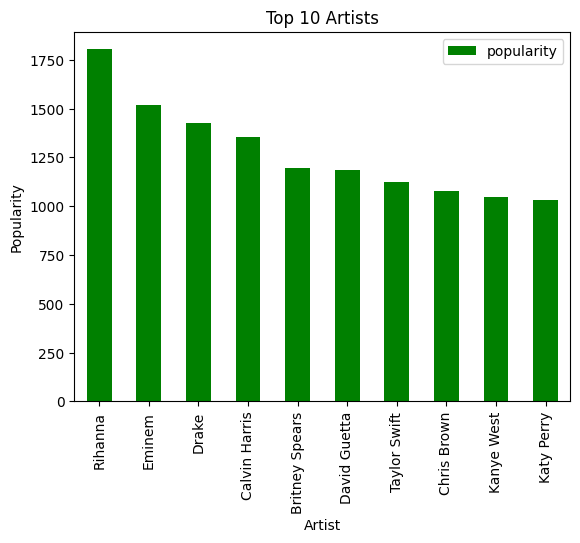

In [5]:
from custom_plots import topArtists
topArtists(df, 10)


### Top 10 Songs

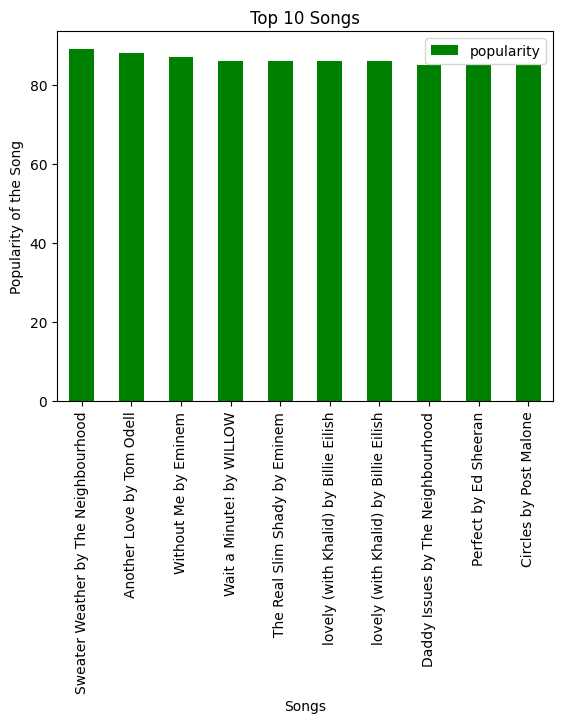

In [6]:
from custom_plots import topSongs
topSongs(df, 10)

### Top 10 Genres

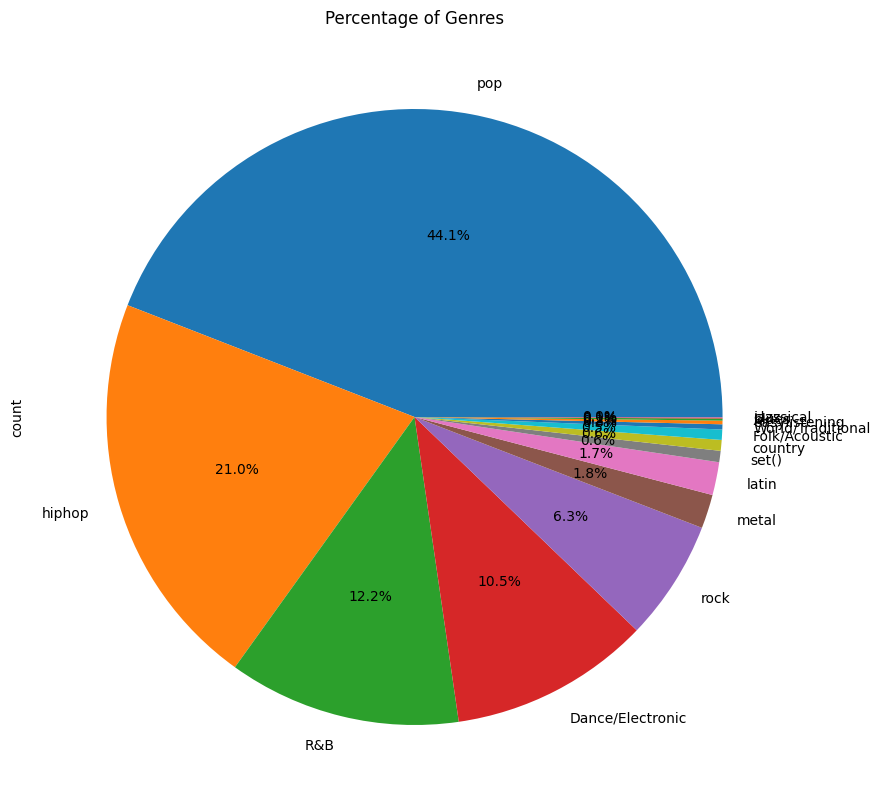

In [2]:
from custom_plots import percGenres
percGenres(df)

### Top Song each Year

In [16]:
max_pop_per_year = df.groupby('year')['popularity'].max()
print(max_pop_per_year)


year
2000    86
2001    78
2002    87
2003    81
2004    81
2005    82
2006    82
2007    80
2008    82
2009    82
2010    81
2011    82
2012    85
2013    89
2014    85
2015    86
2016    84
2017    85
2018    86
2019    85
Name: popularity, dtype: int64


### Explicitness of Songs over the Years

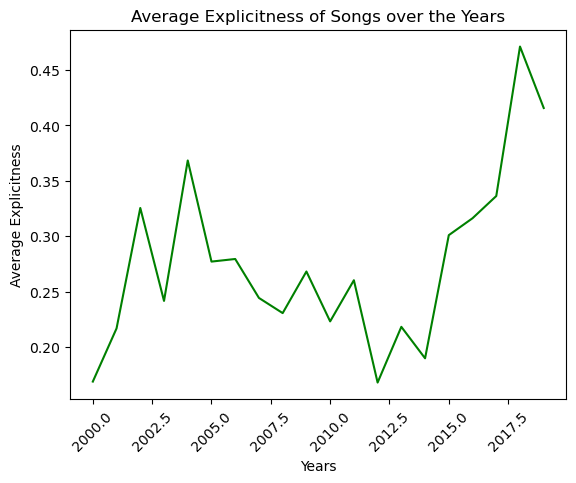

In [17]:
# Grouping the data by 'years' and calculating the average explicit content for each year
explicit_content_by_year = df.groupby('year')['explicit'].mean().reset_index()

# Sorting the data by 'years' in ascending order
explicit_content_by_year = explicit_content_by_year.sort_values('year', ascending=True)

# Creating the plot
plt.plot(explicit_content_by_year['year'], explicit_content_by_year['explicit'], color  = 'green')
plt.xlabel('Years')
plt.ylabel('Average Explicitness')
plt.title('Average Explicitness of Songs over the Years')
plt.xticks(rotation=45)
plt.show()

As we can see, explicit content in songs had its first big peak in ca 2004 before it started to decline again. However, after 2012 we can see a sharp rise in explicitness once again. 

### Correlation between Mode and Popularity of Songs

Text(0.5, 1.0, 'Popularity of Each Mode')

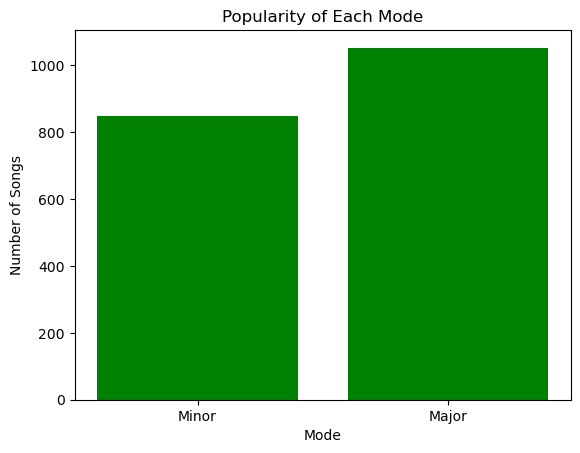

In [18]:
popularityMode = df.groupby('mode').size().reset_index(name='count')
popularityMode['mode'] = popularityMode['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
plt.bar(popularityMode['mode'], popularityMode['count'], color = 'green')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.title('Popularity of Each Mode')

### Effects of Features on Popularity

You can use the featurePlot functions to see the correlation of one feature with the popularity of songs. Choose among the features included in the dataset and add into the function call.

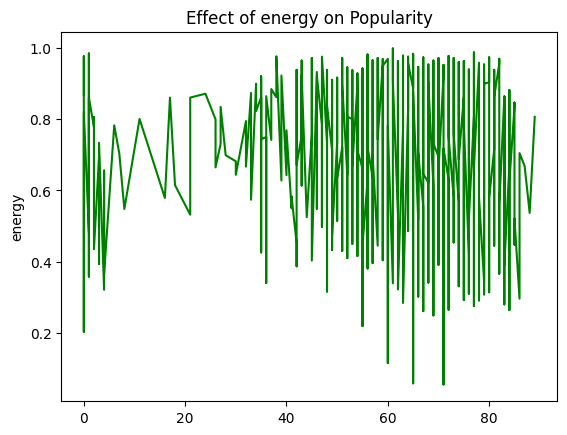

In [11]:
from CustomPlots import featurePlotSingle
featurePlotSingle(df, 'energy')

Alternatively, you can also compare two features of the dataset in comparison to each other and in relation to the popularity of songs. 

TypeError: 'str' object is not callable

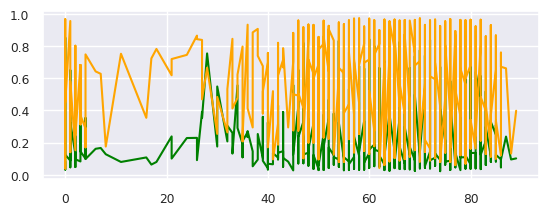

In [14]:
from CustomPlots import featurePlotTwo
featurePlotTwo(df, 'liveness', 'valence')

When plotting the effects of loudness and energy on the popularity of songs, we an observe similarity of the curves to a certain degree. We interpret this as a correlation of these featues, which is supported by the heatmap down below.

/tmp/ipykernel_57055/3434009107.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


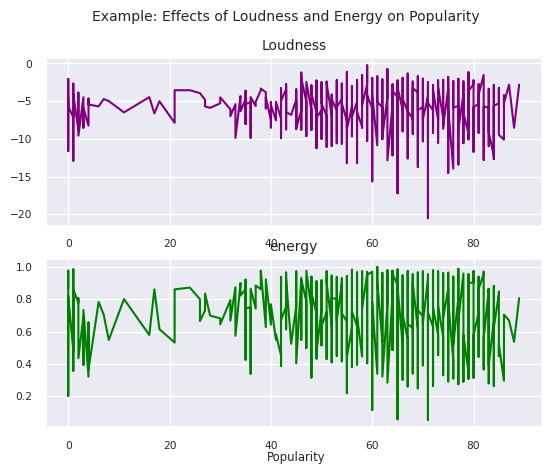

In [9]:
sorted_df = df.sort_values('popularity', ascending = False)
plt.plot(100, 2)
plt.ylabel= 'Popularity'

#plot loudness
plt.subplot(2,1,1)
plt.plot(sorted_df['popularity'], sorted_df['loudness'], color = 'purple')
plt.title("Loudness", fontsize=10)

#plot speechiness
plt.subplot(2,1,2)
plt.plot(sorted_df['popularity'], sorted_df['energy'], color = 'green')
plt.title("energy", fontsize=10)

plt.text(45,-0.2,"Popularity", ha="center")
plt.suptitle("Example: Effects of Loudness and Energy on Popularity")
plt.show()

### Correlation Heatmap

This Heatmap shows in howfar the features of the dataset correalte. A significant correlation can for instance be observed in the correlation of energy and loudness, as well as the correlation of valence (a measure for how positive or negative a song sounds) and danceability.

[Text(0.5, 0, 'duration_ms'),
 Text(1.5, 0, 'year'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo')]

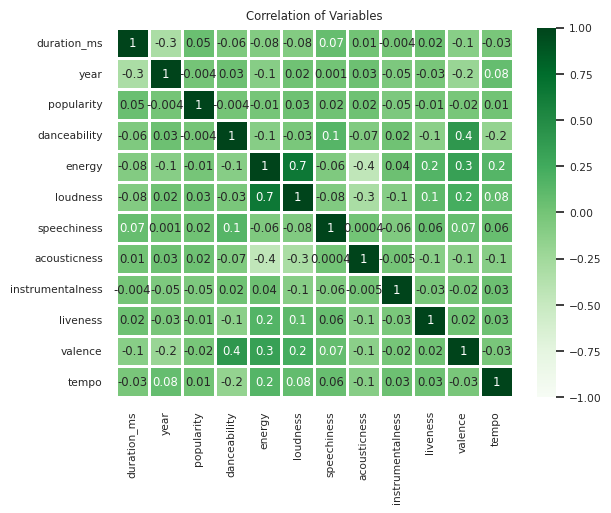

In [8]:
sns.set(font_scale=0.7)
info = df.drop(['artist','genre','song','key','mode','explicit'], axis=1).corr(method = 'pearson')
map = sns.heatmap(info, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=1, linecolor='White',square = False)
map.set_title('Correlation of Variables')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

Here you can try try out the similarity search:

In [5]:
from similarity import similarity_search
similarity_search()

Welcome to Similarity Search:
Insert a song name in the input window, we will find you the five most similar songs to it.

Do you want family-friendly songs? (y/n): n
Enter the name of the song: Breathe
The five most similar songs to >Breathe< are:

                 song          artist                     genre
168   There You'll Be      Faith Hill              pop, country
1188      Just A Kiss          Lady A              pop, country
1906       Without Me          Halsey     pop, Dance/Electronic
94       I Wanna Know             Joe                  pop, R&B
998   Little Lion Man  Mumford & Sons  Folk/Acoustic, rock, pop

Have fun listening!


### 